<a href="https://colab.research.google.com/github/claudio1975/SDS2020/blob/master/notebooks/workshop/0_An_Experimental_EDA_for_a_classification_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Experimental Exploratory Data Analysis for a Classification Task step 0**

### ***From Visualization to Statistical Analysis***

### ***From Feature Engineering to Feature Selection***

### ***From the Best Model Selection to Interpretability***



To start the exploration set up the environment with libraries, upload the data set (it's stored in a github repository) and split it into target variable and features variables. No more set up is required using Google Colab. Look at the guidelines: https://colab.research.google.com/notebooks/welcome.ipynb

#### **Contents**

The goal of this challenge, launched by CrowdAnalytix, is to develop a model to predict whether a mortgage will be funded or not based on certain factors in a customer’s application data. 
The evaluation metric used is the F1 score.
The data set is made up by 45.642 observations with predictor variables (21 features) and the target variable. It's a classification task with the goal to predict the 'Result' target variable for every row (Funded, Not Funded). Look at the competition: https://www.crowdanalytix.com/contests/propensity-to-fund-mortgages


### **Exploratory Data Analysis (EDA) Pipeline**

![](http://www.theleader.info/wp-content/uploads/2017/07/Mortgage-rates.jpg)

# Prepare Workspace

#####- Upload libraries

In [0]:
# Upload libraries

# to handle data set
import pandas as pd
import numpy as np

# to plot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

# statistics
import statistics
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import logit
from scipy.stats import chi2_contingency
from scipy.stats import kurtosis 
from scipy.stats import skew
from statistics import stdev 

# to split data set 
from sklearn.model_selection import train_test_split

# standardization
from sklearn.preprocessing import StandardScaler

# to build models
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# to evaluate models
from sklearn.metrics import f1_score

# to handle imbalanced data set
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# feature engineering
!pip install feature-engine
import feature_engine
from sklearn.preprocessing import KBinsDiscretizer

# feature importance and feature selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
!pip install eli5 
import eli5
from eli5.sklearn import PermutationImportance
!pip install shap
import shap
import eli5
from eli5.sklearn import PermutationImportance

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'
     |████████████████████████████████| 8.7MB 5.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


     |████████████████████████████████| 112kB 2.9MB/s 


Using TensorFlow backend.


     |████████████████████████████████| 276kB 2.9MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394123 sha256=ff0969cc6694cd9c5982013effac84afdf2eac9f7d55797d28b80481ce862924
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


#####- Upload data set

In [0]:
# Upload dataset
url ='https://raw.githubusercontent.com/claudio1975/SDS2020/master/data/CAX_MortgageModeling_Train.csv'
df = pd.read_csv(url)

#####- Split data set

In [0]:
# Split data set between target and features
X_full = df
y = X_full.RESULT
X_full = X_full.drop(['RESULT'], axis=1)


# Summarize Data

In [0]:
# Look at dimension of data set and types of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45642 entries, 0 to 45641
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unique_ID          45642 non-null  object 
 1   MORTGAGE NUMBER    45642 non-null  int64  
 2   PROPERTY VALUE     45642 non-null  int64  
 3   MORTGAGE PAYMENT   45642 non-null  int64  
 4   GDS                45642 non-null  float64
 5   LTV                45642 non-null  float64
 6   TDS                45642 non-null  float64
 7   AMORTIZATION       45642 non-null  int64  
 8   MORTGAGE AMOUNT    45642 non-null  float64
 9   RATE               45642 non-null  float64
 10  MORTGAGE PURPOSE   45642 non-null  object 
 11  PAYMENT FREQUENCY  45642 non-null  object 
 12  PROPERTY TYPE      45642 non-null  object 
 13  TERM               45642 non-null  int64  
 14  FSA                45642 non-null  object 
 15  AGE RANGE          45642 non-null  object 
 16  GENDER             456

In [0]:
# Summarize attribute distributions of the data frame
df.describe(include='all')

,Unique_ID,MORTGAGE NUMBER,PROPERTY VALUE,MORTGAGE PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE AMOUNT,RATE,MORTGAGE PURPOSE,PAYMENT FREQUENCY,PROPERTY TYPE,TERM,FSA,AGE RANGE,GENDER,INCOME,INCOME TYPE,NAICS CODE,CREDIT SCORE,RESULT
count,45642,45642.00000,4.564200e+04,45642.000000,4.564200e+04,45642.000000,4.564200e+04,45642.000000,4.564200e+04,45642.000000,45642,45642,45642,45642.000000,45642,45642,45642,4.564200e+04,45642.000000,45642,45642.000000,45642
unique,45642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6,8,NaN,1141,11,3,NaN,NaN,19,NaN,2
top,CAX_Train_44518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Purchase,Monthly,Single Detached,NaN,L7A,45-49,Male,NaN,NaN,56,NaN,FUNDED
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24419,42785,29377,NaN,898,7645,24849,NaN,NaN,11245,NaN,36023
mean,NaN,22821.50000,5.826110e+05,2392.148043,2.138033e+02,70.632932,4.125670e+02,355.309583,4.255704e+05,4.651149,NaN,NaN,NaN,15.286578,NaN,NaN,NaN,1.251093e+05,5.315017,NaN,662.662811,NaN
std,NaN,13175.85483,4.382082e+05,1688.208721,3.263766e+04,11.566444,6.425859e+04,18.011798,3.020469e+05,0.642371,NaN,NaN,NaN,7.443857,NaN,NaN,NaN,1.149974e+05,3.267761,NaN,132.818234,NaN
min,NaN,1.00000,1.400000e+04,141.000000,-3.704000e+01,6.667000,-1.070000e+01,60.000000,1.500000e+04,2.500000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,1.000000e+03,-1.000000,NaN,0.000000,NaN
25%,NaN,11411.25000,3.400000e+05,1406.000000,1.984000e+01,65.000000,3.284000e+01,360.000000,2.459250e+05,4.250000,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,6.800000e+04,2.000000,NaN,623.000000,NaN
50%,NaN,22821.50000,4.770000e+05,2033.000000,2.921000e+01,75.000000,3.830000e+01,360.000000,3.575000e+05,4.500000,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,9.700000e+04,6.000000,NaN,677.000000,NaN
75%,NaN,34231.75000,6.850000e+05,2866.000000,3.587000e+01,80.000000,4.217000e+01,360.000000,5.120000e+05,5.000000,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,1.450000e+05,8.000000,NaN,736.000000,NaN


In [0]:
# Take a peek at the first rows of the data
df.head(10)

,Unique_ID,MORTGAGE NUMBER,PROPERTY VALUE,MORTGAGE PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE AMOUNT,RATE,MORTGAGE PURPOSE,PAYMENT FREQUENCY,PROPERTY TYPE,TERM,FSA,AGE RANGE,GENDER,INCOME,INCOME TYPE,NAICS CODE,CREDIT SCORE,RESULT
0,CAX_Train_1,1,900000,5429,61.98,65.000,71.63,360,1040000.0,4.0,Refinance,Monthly,Single Detached,12,L4C,Under 25,Male,108000,8,44-45,681,FUNDED
1,CAX_Train_2,2,386000,2179,35.22,74.290,40.65,360,390000.0,4.5,Refinance,Monthly,Single Detached,12,L9T,70 and over,Male,78000,2,56,710,FUNDED
2,CAX_Train_3,3,531000,2152,30.97,80.000,35.41,360,424800.0,3.5,Purchase,Monthly,Single Detached,6,M1N,35-39,Female,87000,2,72,709,FUNDED
3,CAX_Train_4,4,1200000,5410,19.04,75.000,34.14,360,960000.0,5.5,Purchase,Monthly,Single Detached,12,M2M,45-49,Male,300000,8,54,761,FUNDED
4,CAX_Train_5,5,350000,3342,29.59,80.000,34.85,360,592000.0,5.0,Refinance,Monthly,Single Detached,12,L7G,50-54,Male,147000,8,62,762,FUNDED
5,CAX_Train_6,6,420000,2179,26.16,69.050,26.16,240,290000.0,5.5,Refinance,Monthly,Single Detached,24,M1M,40-44,Female,106000,2,53,570,FUNDED
6,CAX_Train_7,7,1600000,5275,32.12,69.230,33.90,360,900000.0,4.0,Refinance,Monthly,Single Detached,12,L7B,55-59,Female,185000,8,56,812,FUNDED
7,CAX_Train_8,8,1500000,4383,35.68,55.170,37.81,360,644000.0,4.0,Refinance,Monthly,Single Detached,12,L3P,45-49,Male,160000,8,48-49,683,FUNDED
8,CAX_Train_9,9,790000,3092,35.29,78.481,35.40,360,620000.0,3.5,Refinance,Monthly,Single Detached,60,M4C,45-49,Female,89000,2,61,684,NOT FUNDED
9,CAX_Train_10,10,650000,1839,38.78,41.850,38.98,360,272000.0,5.5,Purchase,Monthly,Single Detached,12,L4W,40-44,Male,60000,2,56,716,FUNDED


# Automated Exploratory Data Analysis

In [0]:
AV = AutoViz_Class()

Shape of your Data Set: (45642, 22)
Classifying variables in data set...
    21 Predictors classified...
        This does not include the Target column(s)
    3 variables removed since they were ID or low-information variables
Total Number of Scatter Plots = 10
Number of Cat and Continuous Vars exceeds 30, hence no Pivot or Bar Charts
Time to run AutoViz (in seconds) = 6.479


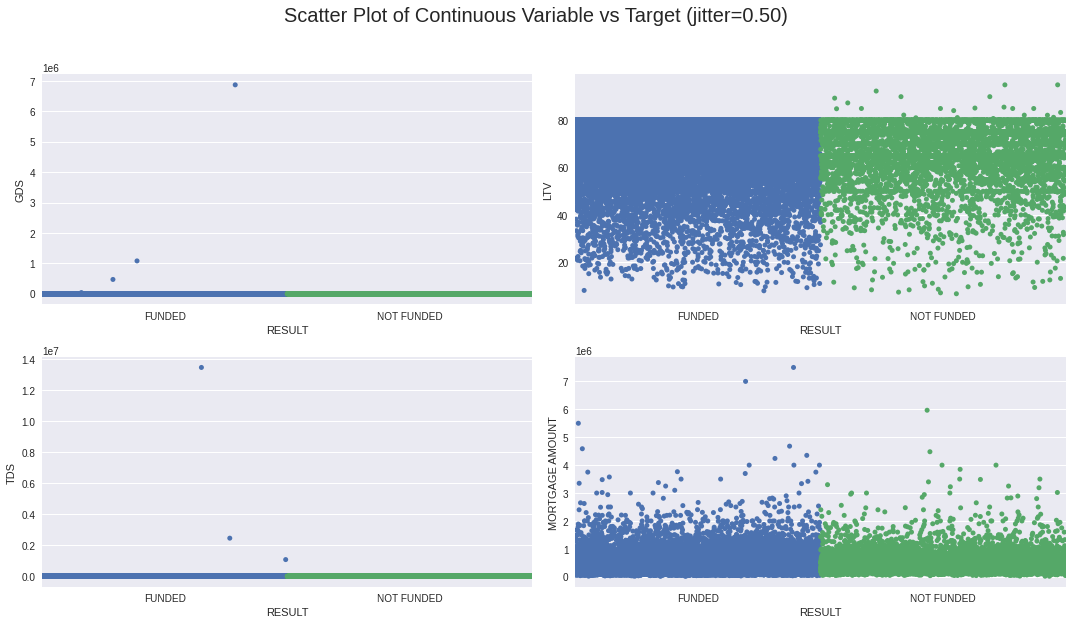

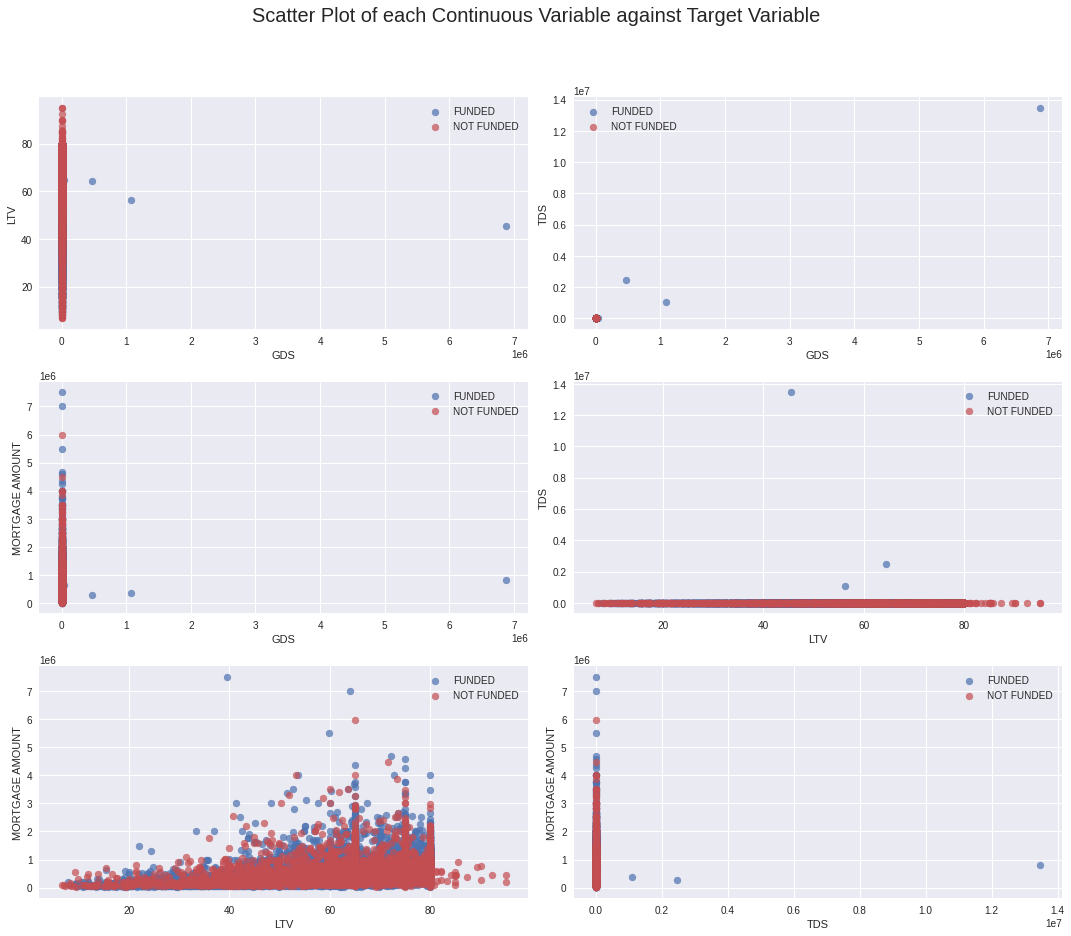

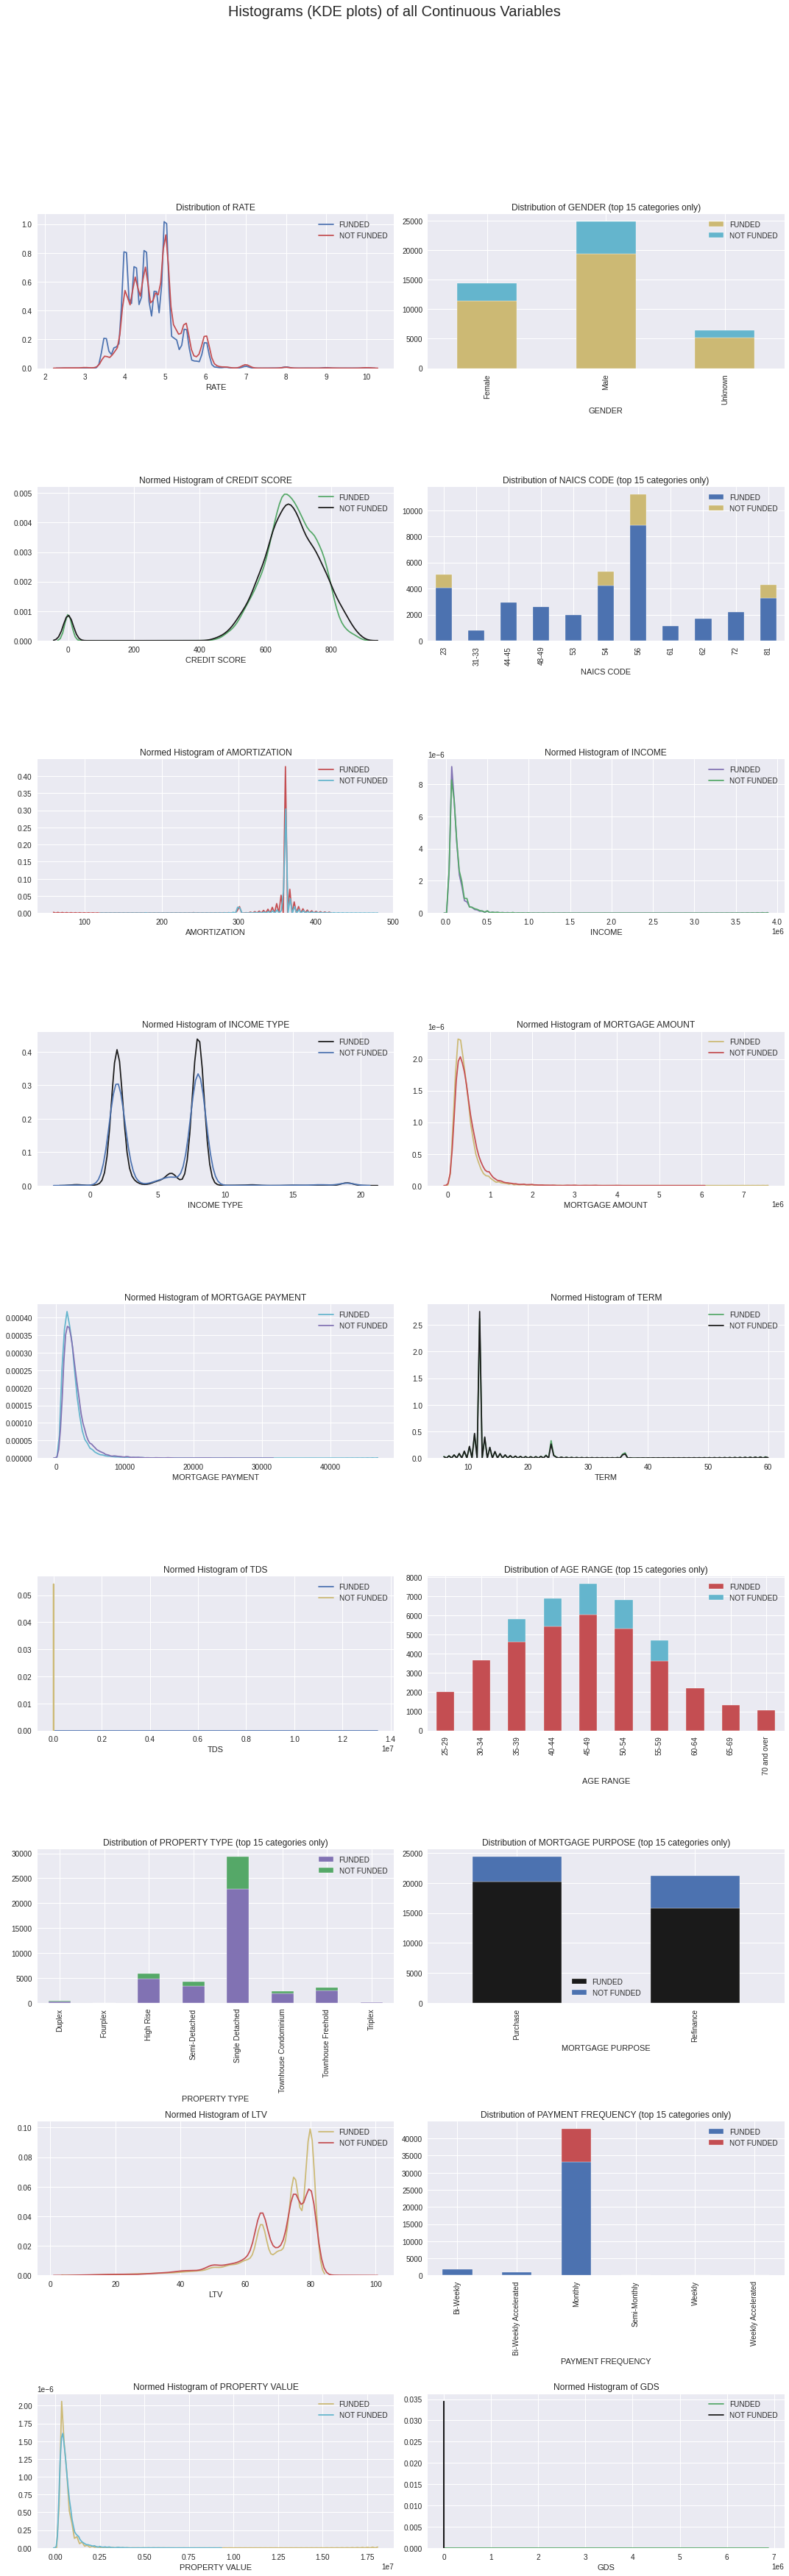

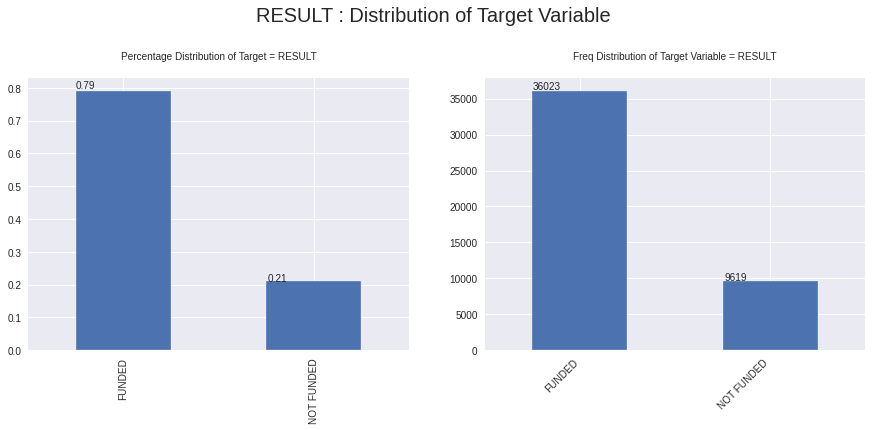

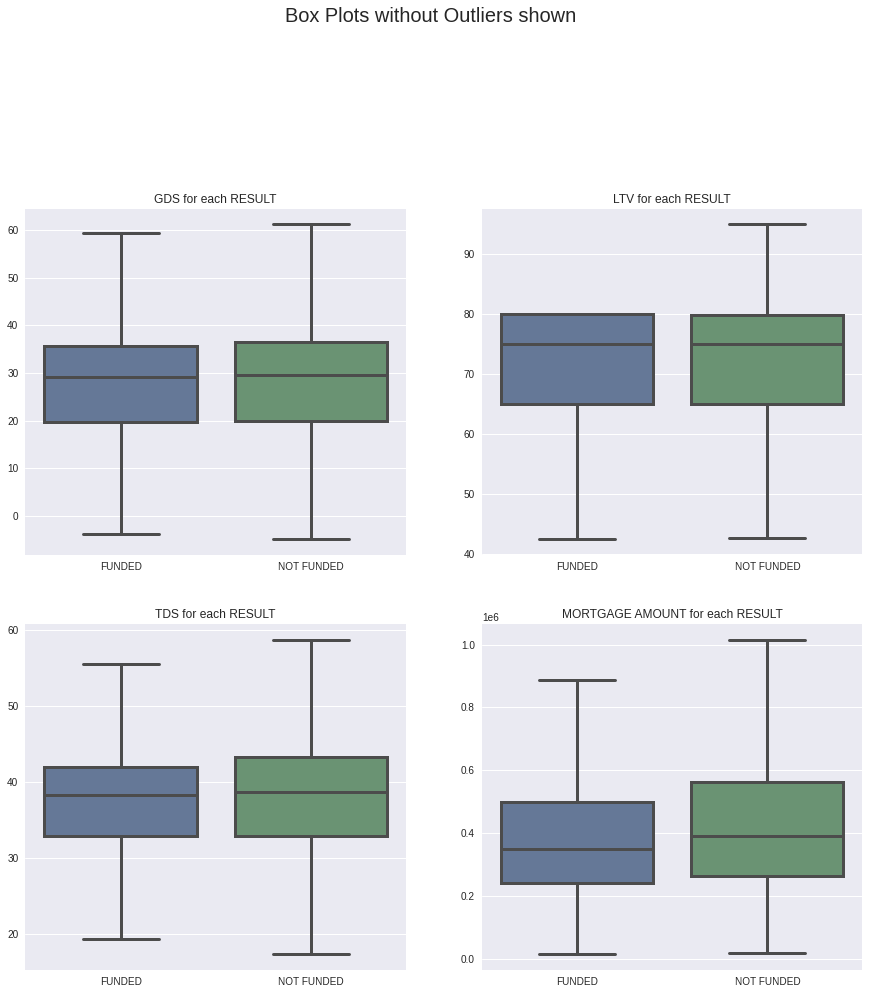

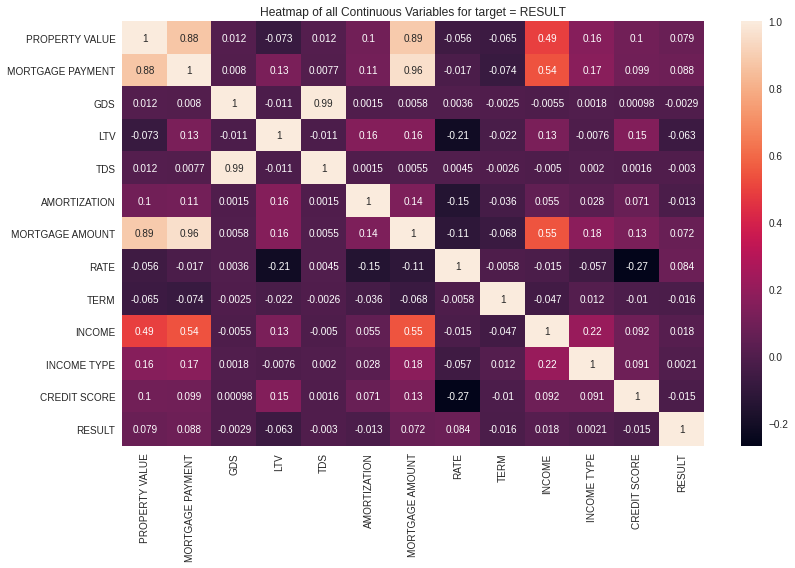

In [0]:
filename = 'https://raw.githubusercontent.com/claudio1975/SDS2020/master/data/CAX_MortgageModeling_Train.csv'
sep = ','
target = "RESULT"
dft = AV.AutoViz(filename, sep, target, df, header=0, verbose=0, lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30)


# References

https://pypi.org/project/autoviz/